In [1]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# NumPy
import numpy as np

# Pandas 
import pandas as pd
pd.set_option('display.max_columns', 200)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

In [2]:
# Load toyota data from excel
df = pd.read_excel('C:/Users/alexa/Downloads/Toyota_Lost.xlsx')

In [3]:
# first 5 rows
df.head(5)

,,DEALERNAME,DT,ITEMGROUPID,ITEMID,WORKTYPE,WORKTYPE_TMR_GROUP,WORKTYPE_TMR_DET,INVENTSERIALID,REPAIRTYPE,MILEAGEQTY,DEALERREPAIRORDERNUMBER,CLIENTSTATUS,WORKANDPARTID,PARTSNUMBER,NAME,UNITPRICE,QTY,PRICEDISCOUNT,TTYPE,PERIOD,DLR_ALL,STATUS_TMR,AGE
0,1,Тойота Центр Саратов,2018-05-14,Toyota,COROLLA,ЗМ,PM,OIL,NMTBB3JE20R004027,С,80999,6018-04344,Ф,2,178010D060,"Фильтр воздушный RAV-4, COROLLA",852.00,1.0,852.00,own,2016-11-01,Тойота Центр Саратов,Недозвон,3.0
1,2,Тойота Центр Саратов,2018-05-14,Toyota,HILUX,ТР,GR,GR,MR0HB3CD100400664,С,63256,6018-04335,Ю,2,178010L040,Фильтр воздушный Hilux 2015,1867.00,1.0,1867.00,NaN,NaT,NaN,NaN,NaN
2,3,Тойота Центр Саратов,2018-05-14,Toyota,LC 150,КМ,GR,WASH,JTEBR3FJ305010164,С,1004,6018-04334,Ф,2,1111,Грузик самоклеющийся 60г,18.00,10.0,180.00,NaN,NaT,NaN,NaN,NaN
3,4,Тойота Центр Саратов,2018-05-15,Others,NotSpecified,КАСКО,BP ins,BP ins,Z8NHSNHGN57946803,К,9849,6018-02711,Ф,2,208073,Салфетка Tackrag,258.69,1.0,219.89,NaN,NaT,NaN,NaN,NaN
4,5,Тойота Центр Саратов,2018-05-15,Others,NotSpecified,КАСКО,BP ins,BP ins,Z8NHSNHGN57946803,К,9849,6018-02711,Ф,2,6311,Малярная лента 3М2328 38мм х 50м,263.96,1.0,224.37,NaN,NaT,NaN,NaN,NaN


In [4]:
# Размерность
df.shape

(209309, 24)

In [5]:
df.dtypes

                                    int64
DEALERNAME                         object
DT                         datetime64[ns]
ITEMGROUPID                        object
ITEMID                             object
WORKTYPE                           object
WORKTYPE_TMR_GROUP                 object
WORKTYPE_TMR_DET                   object
INVENTSERIALID                     object
REPAIRTYPE                         object
MILEAGEQTY                          int64
DEALERREPAIRORDERNUMBER            object
CLIENTSTATUS                       object
WORKANDPARTID                       int64
PARTSNUMBER                        object
NAME                               object
UNITPRICE                         float64
QTY                               float64
PRICEDISCOUNT                     float64
TTYPE                              object
PERIOD                     datetime64[ns]
DLR_ALL                            object
STATUS_TMR                         object
AGE                               

In [6]:
# Базовая оценка нечисловых столбцов
df.describe(include=["object"])

,DEALERNAME,ITEMGROUPID,ITEMID,WORKTYPE,WORKTYPE_TMR_GROUP,WORKTYPE_TMR_DET,INVENTSERIALID,REPAIRTYPE,DEALERREPAIRORDERNUMBER,CLIENTSTATUS,PARTSNUMBER,NAME,TTYPE,DLR_ALL,STATUS_TMR
count,209309,209309,209309,209309,209309,209309,209309,209309,209309,209309,209309,209309,66176,66176,59117
unique,1,4,88,25,10,25,8133,2,28525,3,7669,4120,2,57,35
top,Тойота Центр Саратов,TOYOTA,RAV4,ТО20000,PM,PM20,JTMHT05J704053864,С,6015-24861,Ф,9008043037,Прокладка сливной пробки,own,Тойота Центр Саратов,Активный клиент
freq,209309,101519,48928,20409,128101,20409,339,176279,220,145486,14209,14209,62741,62741,14647


In [7]:
# Базовая оценка нечисловых столбцов
df.describe(include=["datetime64[ns]"])

,DT,PERIOD
count,209309,66176
unique,1021,30
top,2017-01-31 00:00:00,2017-05-01 00:00:00
freq,606,7148
first,2015-11-09 00:00:00,2016-03-01 00:00:00
last,2018-10-10 00:00:00,2018-08-01 00:00:00


In [8]:
# Базовая оценка числовых столбцов
df.describe()

,,MILEAGEQTY,WORKANDPARTID,UNITPRICE,QTY,PRICEDISCOUNT,AGE
count,209309.000000,209309.000000,209309.0,209309.000000,209309.000000,209309.000000,65984.000000
mean,104655.000000,50272.447449,2.0,2110.439306,15.981884,2115.533011,3.075382
std,60422.448084,54645.987665,0.0,9551.181269,132.468860,9574.184731,2.143147
min,1.000000,1.000000,2.0,0.000000,0.000000,0.000000,0.000000
25%,52328.000000,14460.000000,2.0,150.000000,0.300000,68.000000,2.000000
50%,104655.000000,38411.000000,2.0,435.000000,1.000000,395.000000,3.000000
75%,156982.000000,69462.000000,2.0,1250.000000,1.200000,1445.000000,4.000000
max,209309.000000,999999.000000,2.0,601805.640000,9922.000000,601805.640000,13.000000


In [9]:
# Базовая оценка конкретного столбца 
df['UNITPRICE'].describe()

count    209309.000000
mean       2110.439306
std        9551.181269
min           0.000000
25%         150.000000
50%         435.000000
75%        1250.000000
max      601805.640000
Name: UNITPRICE, dtype: float64

In [10]:
# Сортировка
df = df.sort_values(by=['INVENTSERIALID', 'DT', 'PRICEDISCOUNT'],
        ascending=[True, True, True])

df.head(9)

,,DEALERNAME,DT,ITEMGROUPID,ITEMID,WORKTYPE,WORKTYPE_TMR_GROUP,WORKTYPE_TMR_DET,INVENTSERIALID,REPAIRTYPE,MILEAGEQTY,DEALERREPAIRORDERNUMBER,CLIENTSTATUS,WORKANDPARTID,PARTSNUMBER,NAME,UNITPRICE,QTY,PRICEDISCOUNT,TTYPE,PERIOD,DLR_ALL,STATUS_TMR,AGE
59838,59839,Тойота Центр Саратов,2017-11-30,TOYOTA,Not specified,ВР,ВР,BP int,11111111111111100,К,80031,6017-11818,Ю,2,364128,Эмаль АВР Q923H 1000гр,5.75,5.0,28.77,NaN,NaT,NaN,NaN,NaN
44934,44935,Тойота Центр Саратов,2017-11-30,TOYOTA,Not specified,ВР,ВР,BP int,11111111111111100,К,80031,6017-13133,Ю,2,364119,Эмаль АВР Q195 1000гр,4.03,15.0,60.50,NaN,NaT,NaN,NaN,NaN
4165,4166,Тойота Центр Саратов,2017-11-30,TOYOTA,Not specified,ВР,ВР,BP int,11111111111111100,К,80031,6017-13133,Ю,2,364077,Эмаль АВР Q766 950гр,4.30,16.0,68.77,NaN,NaT,NaN,NaN,NaN
128521,128522,Тойота Центр Саратов,2017-11-30,TOYOTA,Not specified,ВР,ВР,BP int,11111111111111100,К,80031,6017-13133,Ю,2,331348,Отвердитель AC Plus Hardener P25 1000гр,1.81,50.0,90.37,NaN,NaT,NaN,NaN,NaN
14705,14706,Тойота Центр Саратов,2017-11-30,TOYOTA,Not specified,ВР,ВР,BP int,11111111111111100,К,80031,6017-11818,Ю,2,646,Растворитель 646 1л,100.44,1.0,100.44,NaN,NaT,NaN,NaN,NaN
61282,61283,Тойота Центр Саратов,2017-11-30,TOYOTA,Not specified,ВР,ВР,BP int,11111111111111100,К,80031,6017-11818,Ю,2,7643,Салфетки КИМТЕХ,14.90,7.0,104.33,NaN,NaT,NaN,NaN,NaN
83723,83724,Тойота Центр Саратов,2017-11-30,TOYOTA,Not specified,ВР,ВР,BP int,11111111111111100,К,80031,6017-11818,Ю,2,331348,Отвердитель AC Plus Hardener P25 1000гр,1.81,65.0,117.49,NaN,NaT,NaN,NaN,NaN
50954,50955,Тойота Центр Саратов,2017-11-30,TOYOTA,Not specified,ВР,ВР,BP int,11111111111111100,К,80031,6017-11818,Ю,2,364081,Эмаль АВР Q120 5200гр,2.06,62.0,127.68,NaN,NaT,NaN,NaN,NaN
141960,141961,Тойота Центр Саратов,2017-11-30,TOYOTA,Not specified,ВР,ВР,BP int,11111111111111100,К,80031,6017-13133,Ю,2,90.2100.9,Перчатки нитриловые L(шт),11.49,12.0,137.93,NaN,NaT,NaN,NaN,NaN


In [11]:
# Save analytical base table csv
df.to_csv('toyota_sort.csv', index=None)

In [12]:
# Save analytical base table excel
df.to_excel('toyota_sort.xlsx', index=None)

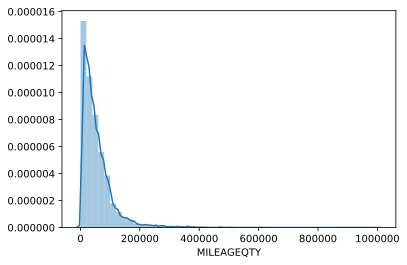

In [13]:
%config InlineBackend.figure_format = 'svg' 
sns.distplot(df.MILEAGEQTY);

In [14]:
df.DT.head()

59838    2017-11-30
44934    2017-11-30
4165     2017-11-30
128521   2017-11-30
14705    2017-11-30
Name: DT, dtype: datetime64[ns]

In [15]:
df['Y_dt'] = df.DT.map(lambda x: x.strftime('%Y'))

In [16]:
df.head()

,,DEALERNAME,DT,ITEMGROUPID,ITEMID,WORKTYPE,WORKTYPE_TMR_GROUP,WORKTYPE_TMR_DET,INVENTSERIALID,REPAIRTYPE,MILEAGEQTY,DEALERREPAIRORDERNUMBER,CLIENTSTATUS,WORKANDPARTID,PARTSNUMBER,NAME,UNITPRICE,QTY,PRICEDISCOUNT,TTYPE,PERIOD,DLR_ALL,STATUS_TMR,AGE,Y_dt
59838,59839,Тойота Центр Саратов,2017-11-30,TOYOTA,Not specified,ВР,ВР,BP int,11111111111111100,К,80031,6017-11818,Ю,2,364128,Эмаль АВР Q923H 1000гр,5.75,5.0,28.77,NaN,NaT,NaN,NaN,NaN,2017
44934,44935,Тойота Центр Саратов,2017-11-30,TOYOTA,Not specified,ВР,ВР,BP int,11111111111111100,К,80031,6017-13133,Ю,2,364119,Эмаль АВР Q195 1000гр,4.03,15.0,60.50,NaN,NaT,NaN,NaN,NaN,2017
4165,4166,Тойота Центр Саратов,2017-11-30,TOYOTA,Not specified,ВР,ВР,BP int,11111111111111100,К,80031,6017-13133,Ю,2,364077,Эмаль АВР Q766 950гр,4.30,16.0,68.77,NaN,NaT,NaN,NaN,NaN,2017
128521,128522,Тойота Центр Саратов,2017-11-30,TOYOTA,Not specified,ВР,ВР,BP int,11111111111111100,К,80031,6017-13133,Ю,2,331348,Отвердитель AC Plus Hardener P25 1000гр,1.81,50.0,90.37,NaN,NaT,NaN,NaN,NaN,2017
14705,14706,Тойота Центр Саратов,2017-11-30,TOYOTA,Not specified,ВР,ВР,BP int,11111111111111100,К,80031,6017-11818,Ю,2,646,Растворитель 646 1л,100.44,1.0,100.44,NaN,NaT,NaN,NaN,NaN,2017


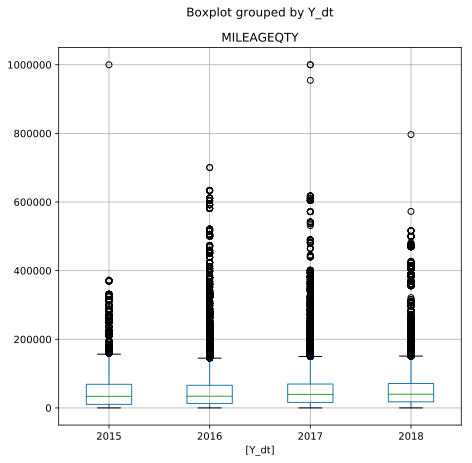

In [17]:
df.boxplot(column='MILEAGEQTY',  by=['Y_dt'], 
           figsize=(7,7))
plt.show()

In [18]:
y_17 = df[df["Y_dt"] == '2017']

In [19]:
y_18 = df[df["Y_dt"] == '2018']

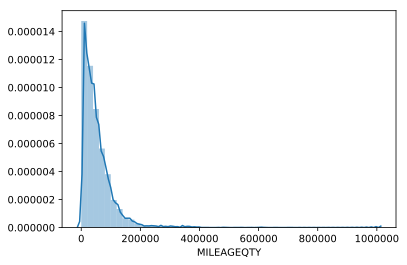

In [20]:
%config InlineBackend.figure_format = 'svg' 
sns.distplot(y_17.MILEAGEQTY);

In [21]:
y_17_m = y_17[df["MILEAGEQTY"] < 600000]

C:\Users\alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


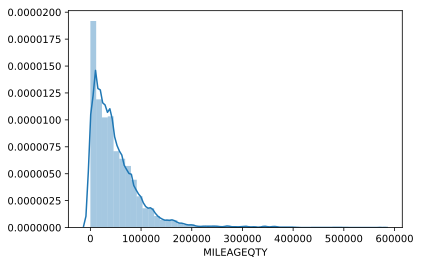

In [22]:
%config InlineBackend.figure_format = 'svg' 
sns.distplot(y_17_m.MILEAGEQTY);

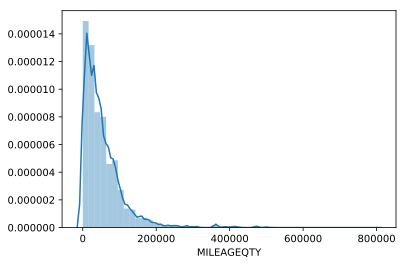

In [23]:
%config InlineBackend.figure_format = 'svg' 
sns.distplot(y_18.MILEAGEQTY);

In [24]:
# Segment by property_type and display the means and standard deviations within each class
df.groupby("Y_dt").MILEAGEQTY.agg([np.mean, np.std])

,mean,std
Y_dt,,
2015,50083.298100,57793.170245
2016,48812.940165,54173.459979
2017,50398.679296,53386.016347
2018,53068.335619,56628.373908


In [26]:
df['Y_dt_oper'] = df.DT.map(lambda x: x.strftime('%Y.%m'))

In [27]:
df.head()

,,DEALERNAME,DT,ITEMGROUPID,ITEMID,WORKTYPE,WORKTYPE_TMR_GROUP,WORKTYPE_TMR_DET,INVENTSERIALID,REPAIRTYPE,MILEAGEQTY,DEALERREPAIRORDERNUMBER,CLIENTSTATUS,WORKANDPARTID,PARTSNUMBER,NAME,UNITPRICE,QTY,PRICEDISCOUNT,TTYPE,PERIOD,DLR_ALL,STATUS_TMR,AGE,Y_dt,Y_dt_oper
59838,59839,Тойота Центр Саратов,2017-11-30,TOYOTA,Not specified,ВР,ВР,BP int,11111111111111100,К,80031,6017-11818,Ю,2,364128,Эмаль АВР Q923H 1000гр,5.75,5.0,28.77,NaN,NaT,NaN,NaN,NaN,2017,2017.11
44934,44935,Тойота Центр Саратов,2017-11-30,TOYOTA,Not specified,ВР,ВР,BP int,11111111111111100,К,80031,6017-13133,Ю,2,364119,Эмаль АВР Q195 1000гр,4.03,15.0,60.50,NaN,NaT,NaN,NaN,NaN,2017,2017.11
4165,4166,Тойота Центр Саратов,2017-11-30,TOYOTA,Not specified,ВР,ВР,BP int,11111111111111100,К,80031,6017-13133,Ю,2,364077,Эмаль АВР Q766 950гр,4.30,16.0,68.77,NaN,NaT,NaN,NaN,NaN,2017,2017.11
128521,128522,Тойота Центр Саратов,2017-11-30,TOYOTA,Not specified,ВР,ВР,BP int,11111111111111100,К,80031,6017-13133,Ю,2,331348,Отвердитель AC Plus Hardener P25 1000гр,1.81,50.0,90.37,NaN,NaT,NaN,NaN,NaN,2017,2017.11
14705,14706,Тойота Центр Саратов,2017-11-30,TOYOTA,Not specified,ВР,ВР,BP int,11111111111111100,К,80031,6017-11818,Ю,2,646,Растворитель 646 1л,100.44,1.0,100.44,NaN,NaT,NaN,NaN,NaN,2017,2017.11


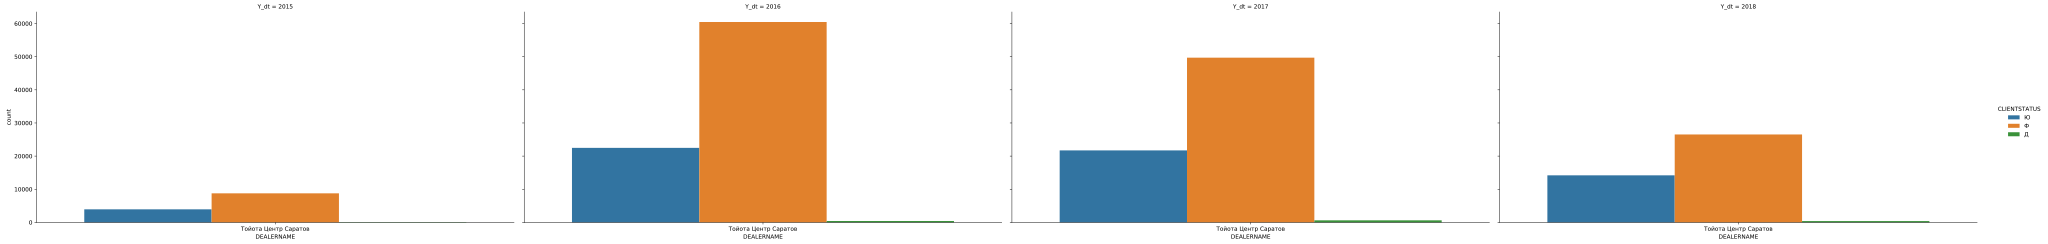

In [28]:
g = sns.catplot(x="DEALERNAME", hue="CLIENTSTATUS",  col="Y_dt",
                 data=df, kind="count",
                 height=6, aspect=2);

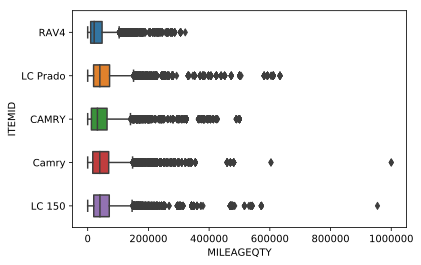

In [29]:
top_models = df.ITEMID.value_counts().sort_values(ascending = False).head(5).index.values
ax = sns.boxplot(y="ITEMID", x="MILEAGEQTY", 
            data=df[df.ITEMID.isin(top_models)], orient="h", width=.5)
ax

In [30]:
sum_data = df[df["WORKANDPARTID"] == 2][df["MILEAGEQTY"] < 10000].groupby('INVENTSERIALID').PRICEDISCOUNT.agg({'total_products': 'count', 
                                                                                     'total_sum': 'sum'  })

# Display parts data for first 5 customers only parts & mileage < 10K
sum_data.head()

,total_products,total_sum
INVENTSERIALID,,
4T3BA3BB00U066825,9,5908.25
4T3BA3BB70U057054,9,5812.25
4T3BA3BB90U054771,18,11223.60
5TDBKRFH40S039448,16,14008.40
5TDBKRFH60S098534,9,6636.05


In [31]:
sum_data_f = df.groupby('INVENTSERIALID').PRICEDISCOUNT.agg({'total_products': 'count', 'total_sum': 'sum'  })

# Display parts data for first 5 customers only parts & mileage < 10K
sum_data_f.head()

,total_products,total_sum
INVENTSERIALID,,
11111111111111100,32,11138.85
19XFB2670DE800704,1,7020.00
1HGRM4870EL512030,1,2502.90
2T3BF4DV8AW032406,24,20160.09
4T3BA3BB00U048597,143,113779.49


In [33]:
# только со статусом
df_lost = df[df['STATUS_TMR'].notnull()].sort_values(by=['INVENTSERIALID', 'DT', 'PERIOD'],
        ascending=[True, True, True])

In [34]:
df_lost.head()


,,DEALERNAME,DT,ITEMGROUPID,ITEMID,WORKTYPE,WORKTYPE_TMR_GROUP,WORKTYPE_TMR_DET,INVENTSERIALID,REPAIRTYPE,MILEAGEQTY,DEALERREPAIRORDERNUMBER,CLIENTSTATUS,WORKANDPARTID,PARTSNUMBER,NAME,UNITPRICE,QTY,PRICEDISCOUNT,TTYPE,PERIOD,DLR_ALL,STATUS_TMR,AGE,Y_dt,Y_dt_oper
10925,10926,Тойота Центр Саратов,2016-07-23,TOYOTA,VENZA,ТО20000,PM,PM20,4T3BA3BB00U065660,С,20552,6016-08736,Ф,2,890104,Защитный лак-спрей для клемм 150мл,371.0,0.15,55.65,own,2016-07-01,Тойота Центр Саратов,Активный клиент,1.0,2016,2016.07
109777,109778,Тойота Центр Саратов,2016-07-23,TOYOTA,VENZA,ТО20000,PM,PM20,4T3BA3BB00U065660,С,20552,6016-08736,Ф,2,9008043037,Прокладка сливной пробки,68.0,1.00,68.00,own,2016-07-01,Тойота Центр Саратов,Активный клиент,1.0,2016,2016.07
76881,76882,Тойота Центр Саратов,2016-07-23,TOYOTA,VENZA,ТО20000,PM,PM20,4T3BA3BB00U065660,С,20552,6016-08736,Ф,2,26682_K7,Очиститель (обезжириватель) 520 мл,240.0,0.30,72.00,own,2016-07-01,Тойота Центр Саратов,Активный клиент,1.0,2016,2016.07
30441,30442,Тойота Центр Саратов,2016-07-23,TOYOTA,VENZA,ТО20000,PM,PM20,4T3BA3BB00U065660,С,20552,6016-08736,Ф,2,8931061,Смазка HHS2000 для петель замков и др. агрегатов.,440.0,0.20,88.00,own,2016-07-01,Тойота Центр Саратов,Активный клиент,1.0,2016,2016.07
51625,51626,Тойота Центр Саратов,2016-07-23,TOYOTA,VENZA,ТО20000,PM,PM20,4T3BA3BB00U065660,С,20552,6016-08736,Ф,2,888780609,Смазка тормозного механизма,2178.0,0.15,326.70,own,2016-07-01,Тойота Центр Саратов,Активный клиент,1.0,2016,2016.07


In [37]:
# кто в итоге приехал (активные)
df_act = df[df['DT'] > df['PERIOD']]

In [66]:
# группировка просто так
df_act_vin = df_act.groupby('INVENTSERIALID').PARTSNUMBER.agg({'total_Un_products': 'nunique'})
a = df_act_vin.head()

In [70]:
# Reset index
df_act.reset_index(inplace=True)
a=df_act['INVENTSERIALID']

In [80]:
# те, кто не активные
df_lost_real = df_lost[~df_lost.INVENTSERIALID.isin(a)]

In [99]:
df_g_lost_real = df_lost_real.groupby(['INVENTSERIALID', 'DT', 'ITEMID', 'WORKTYPE', 'MILEAGEQTY', 'DEALERREPAIRORDERNUMBER', 'PERIOD', 'STATUS_TMR', 'AGE']).PARTSNUMBER.agg({'total_Un_products': 'nunique'})

In [100]:
df_g_lost_real.head(12)

total_Un_products
INVENTSERIALID    DT         ITEMID WORKTYPE MILEAGEQTY DEALERREPAIRORDERNUMBER PERIOD     STATUS_TMR            AGE                   
4T3BA3BB00U066453 2016-04-26 VENZA  ТР       30192      6016-04825              2018-08-01 Продан в тот же город 3.0                 10
                  2016-09-05 VENZA  ТО40000  40399      6016-10719              2018-08-01 Продан в тот же город 3.0                 10
                  2017-01-27 VENZA  ТО50000  49798      6017-00779              2018-08-01 Продан в тот же город 3.0                  9
                  2017-04-10 VENZA  ЗЧ       49798      6017-03394              2018-08-01 Продан в тот же город 3.0                  3
                  2017-04-18 VENZA  ЗЧ       49798      6017-03763              2018-08-01 Продан в тот же город 3.0                  2
                  2017-06-07 VENZA  ТО60000  60027      6017-06048              2018-08-01 Продан в тот же город 3.0                  9
4T3BA3BB10U054019 2015-12-12 VENZA  ТР       29017      6015-24964              2017-04-01 Недозвон              3.0                  9
                                                                                2017-05-01 Закончилась гарантия  3.0                  9
                  2016-04-30 VENZA  ТР       32193      6016-03100              2017-04-01 Недозвон              3.0                  1
                                                                                2017-05-01 Закончилась гарантия  3.0                  1
                  2016-05-20 VENZA  ЗЧ       32193      6016-05100              2017-04-01 Недозвон              3.0                  3
                                                                                2017-05-01 Закончилась гарантия  3.0                  3